# Week 6 - Networks 

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
In this lab you'll do some exercises to familiarise yourself with network properties and concepts.
</div>

## Setup

Make sure you have `python >= 3.10`. Check using `python --version` or `python3 --version`.

**Week 6 packages**

This week we will use:
- networkx
- ipykernel
- matplotlib
- scipy
- numpy
- pandas

**imports**

In [2]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
%matplotlib inline

## **INTRODUCTION**

## Exploring classes in python.


**Investigating objects**

To view the available properties of an object, we can use the <small>`dir(object)`</small> function. <br>
This will display all methods (functions), attribues (variables) belonging to an object. 

> **Note** <br>
> Aside from using the python <small>`dir(object)`</small> function, there are other ways to investigate objects:
> - Read the docs / manual (eg the [python docs](https://www.python.org/doc/), or the [networkx docs](https://networkx.org/documentation/stable/reference/index.html))
> - By right clicking -> "Go to definition" (F12) in VSC 
> - By investigating objects during runtime using the VSC debugger. <br><br>

We can use <small>`dir(object)`</small> to investigate the contents of the ***networkx*** package. 


**Data in python**

Python supports many types of data containers. These include ***variables***, ***collections*** (such as lists), and ***classes***. <br>
In python, these are all internally stored as objects. 

Quoting from the [python reference docs](https://docs.python.org/3/reference/datamodel.html): <br>
*"Objects are Python’s abstraction for data. All data in a Python program is represented by objects or by relations between objects."*

Even imported packages / external python files using the ***module system*** are stored as objects. 

These objects may have subobjects. For example:
- The functions available in an imported package
- Attributes/methods on classes

We will work with **Graph()** (undirected) and **DiGraph()** (directed) graph classes supplied by networkx today. <br>
Let's see what attributes the Graph() class has:


In [3]:
dir(nx.Graph)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__networkx_backend__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_fact

We can try a few of these out to see how they work. Run the cell below.

In [4]:
graphA = nx.Graph()
print(graphA.is_directed())
print(graphA.size())

graphA.add_edge('A', 'B')
print(graphA.size())

False
0
1


Rather than printing out DiGraph's methods, the following cell will list the attributes which are **exclusive** to Graph or DiGraph.

In [5]:
graphA_attributes = set(dir(nx.Graph))
graphB_attributes = set(dir(nx.DiGraph))

print('\nGraphA (Graph) exclusive attributes:')
print(list(graphA_attributes - graphB_attributes))

print('\nGraphB (DiGraph) exclusive attributes:')
print(list(graphB_attributes - graphA_attributes))


GraphA (Graph) exclusive attributes:
[]

GraphB (DiGraph) exclusive attributes:
['pred', 'has_predecessor', '_pred', 'in_degree', 'in_edges', 'out_degree', 'out_edges', 'has_successor', 'successors', 'reverse', 'succ', '_succ', 'predecessors']


The directed graph class has a more methods than the undirected graph class.  <br>
This is because directed graphs differentiate between incoming vs outgoing edges on a node. 

## Intro Exercise 1 - Interpreting Graphs

Given the <b>undirected</b> graph drawn below, write down the adjacency matrix.<br>
Do this inside the markdown cell below. 

For example (different network): 

```
  X Y Z
X 0 1 1
Y 1 0 0 
Z 1 0 0 
```  

<img src="./media/small_graph_undirected.png" width="400">

```
# YOUR ANSWER HERE
  A B C D
A        
B        
C        
D        
```

Given the <b>directed</b> graph drawn below, write down the adjacency matrix. <br>
Think whether the matrix should still be symmetrical.

<img src="./media/small_graph_directed.png" width="400">



```
# YOUR ANSWER HERE   
            (child)  
           A B C D E 
         A           
         B           
(parent) C           
         D           
         E           
```

## Intro Exercise 2 - Defining Graphs

Create the above graphs in networkx. use the <b>graph_object.add_edge()</b> method to add edges. 
<br>An example showing how to draw GraphA, and show other representations of the data is given below.

Define an **undirected** networkx graph object and add nodes/edges:

In [6]:
graphA = nx.Graph()

# YOUR CODE HERE
graphA = nx.Graph()
graphA.add_edge('A','B')
graphA.add_edge('A','C')
graphA.add_edge('B','C')
graphA.add_edge('C','D')

# raise NotImplementedError

Define a **directed** networkx graph object and add nodes/edges:

In [7]:
graphB = nx.DiGraph()

# YOUR CODE HERE
graphB = nx.DiGraph()
graphB.add_edge('A','B')
graphB.add_edge('A','C')
graphB.add_edge('C','B')
graphB.add_edge('C','D')
graphB.add_edge('E','C')

# raise NotImplementedError

<br>The following 4 cells show different representations of our graph:<br>

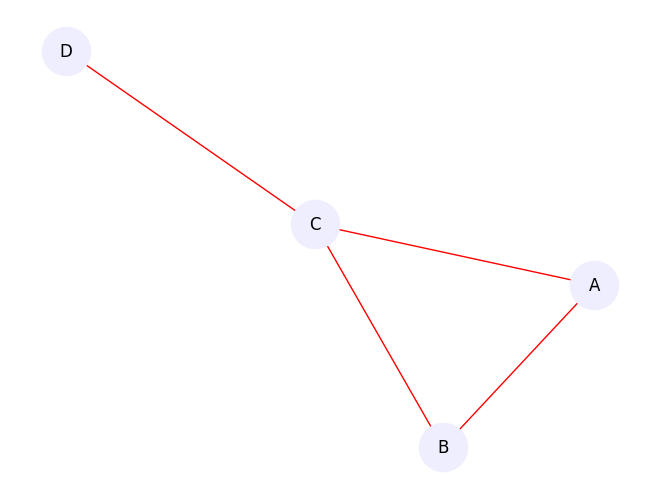

In [8]:
nx.draw_spring(graphA, with_labels=True, node_size=1200, node_color='#eeeeff', edge_color='red')

In [9]:
nx.adjacency_matrix(graphA)

<Compressed Sparse Row sparse array of dtype 'int64'
	with 8 stored elements and shape (4, 4)>

In [10]:
print(nx.adjacency_matrix(graphA))

<Compressed Sparse Row sparse array of dtype 'int64'
	with 8 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1


The output from the above cells only shows connections between nodes. It does not show where there are two nodes that are not connected as this is not useful information. Print the numpy array below to see how the coordinates only show where the connections occur. 

In [11]:
print(graphA.nodes())
nx.to_numpy_array(graphA)

['A', 'B', 'C', 'D']


array([[0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [1., 1., 0., 1.],
       [0., 0., 1., 0.]])

<br>networkx seems to be using 'numpy' - a popular python library, to store graph data. 
<br>numpy allows matrix and vector operations to be performed quickly and efficiently. This makes sense if our network gets very big! 

Lets also check graphB to see if we created it correctly. Print the adjacency matrix for `graphB` (as above) in the folowing cell:

<Compressed Sparse Row sparse array of dtype 'int64'
	with 5 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (2, 1)	1
  (2, 3)	1
  (4, 2)	1


array([[0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

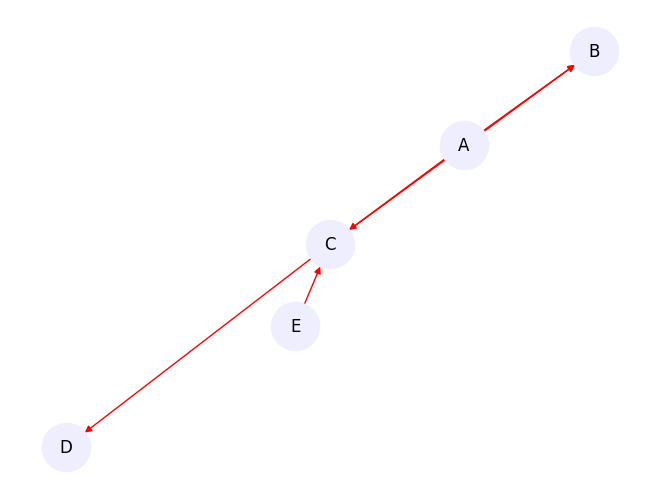

In [12]:
nx.draw_spring(graphB, with_labels=True, node_size=1200, node_color='#eeeeff', edge_color='red')
print(nx.adjacency_matrix(graphB))
nx.to_numpy_array(graphB)

## **Exercises**

</div>

## Exercise 1 - Network Properties 

Complete the function below to find the degree distrbution for any given graph. You can use the networkx method `graph.degree()`, which returns the number of edges connecting to each node. You should return a dictionary or a Counter: the keys should be all observed vertex degree values in the graph, and the values are the counts showing how often a vertex with that degree was observed.

For instance, calling `degree_distribution()` on `graphA` above could return

```{2: 2, 3: 1, 1: 1}``` or ```Counter({2: 2, 3: 1, 1: 1})```

Meaning that there is one vertex with degree 1 (D), two vertices with degree 2 (A and B), and one vertex with degree 3 (C).

The dictionary will give us a handy form for plotting the degree distribution.

In [13]:
# Here's the networkx function `graph.degree()`:
graphA.degree('C')

3

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<b>Challenge:</b> Write a function that calculates the degree frequency in the graph. It returns a dictionary. The keys should be all observed vertex degree values in the graph, and the values are the counts showing how often a vertex with that degree was observed.

Hint:

- You may use `from collections import Counter` to construct a counting dictionary.

</div>

In [14]:
def degree_distribution(graph):
    """
    For the networkx graph provided, return a dictionary, where
    the keys are all observed vertex degrees, and values are 
    the corresponding counts.
    """
    # YOUR CODE HERE
    # Counter solution
    from collections import Counter
    degrees = [graph.degree(n) for n in graph.nodes()]
    return Counter(degrees)
    raise NotImplementedError

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;"></div>

Once you have this function, you can draw the degree distribution with a scatter plot:

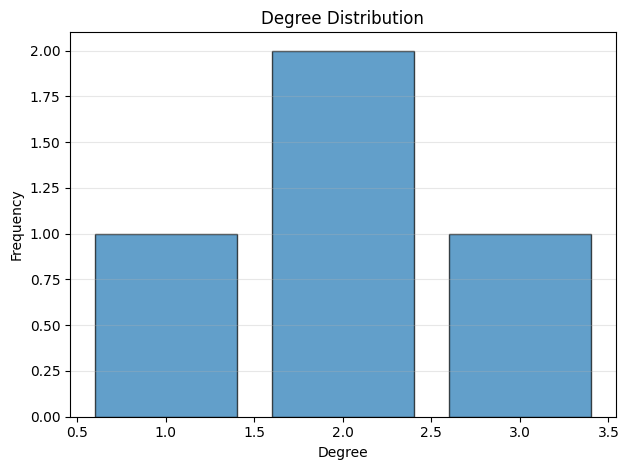

In [15]:
# Graph A:
def plot_degree_distribution(degree_dict):
    degrees = sorted(degree_dict.keys())
    counts = [degree_dict[d] for d in degrees]

    _, ax = plt.subplots()
    ax.bar(degrees, counts, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')
    ax.set_title('Degree Distribution')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

degree_dict = degree_distribution(graphA)
plot_degree_distribution(degree_dict)

Here are some graphs of types described in lectures. You can generate other graph types with networkx functions described at https://networkx.github.io/documentation/stable/reference/generators.html

A random (Erdos-Renyi) graph:

In [16]:
# 600 nodes, probability of each edge 0.4
random_graph = nx.fast_gnp_random_graph(600, 0.4)

A scale-free graph:

In [17]:
# 600 nodes
scale_free_graph = nx.scale_free_graph(600)

If you are finding the degree distribution correctly, you can plot the distributions for these different graph types:

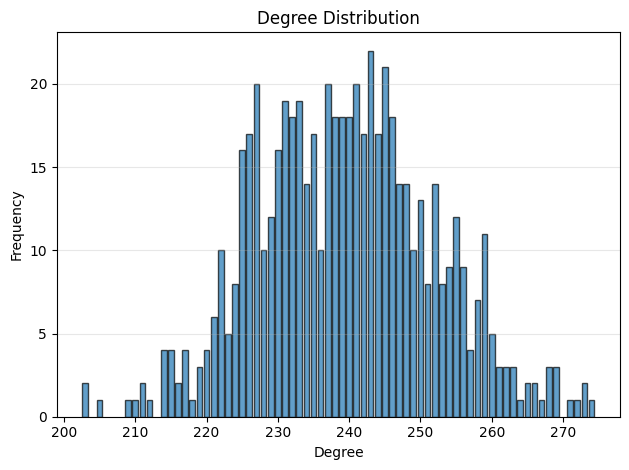

In [18]:
degree_dict = degree_distribution(random_graph)
plot_degree_distribution(degree_dict)

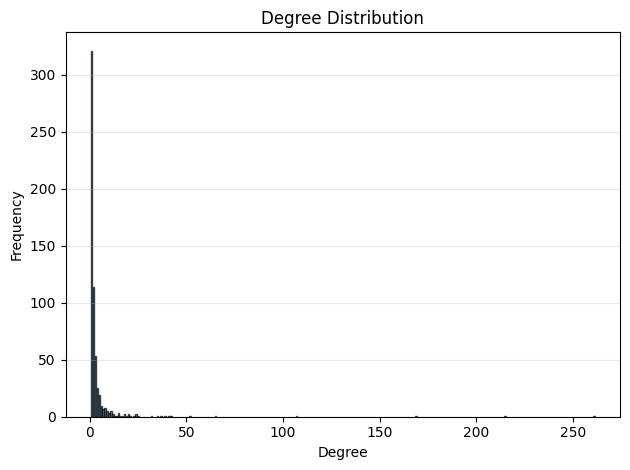

In [19]:
degree_dict = degree_distribution(scale_free_graph)
plot_degree_distribution(degree_dict)

<div style= border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Exercise 2: Protein-protein interaction networks</h3>

<h4> The Data:</h4>

In this question we will look at ***a small subgraph*** of the baker's yeast Protein-Protein-Interaction network, taken from the [STRING database](https://string-db.org/). 

This data is available as `data/saccharomyces_cerevisiae_ppi.pickle` within the week6 folder.

> ***What's a .pickle file?*** <br>
> The `pickle` python package provides a way to write python objects ***directly to disk*** as binary files. <br> 
> For those who are familiar with R, consider this similar to an Rdata file. <br>
> PPI networks are available via STRING .tsv files, so the download and loading of the .tsv to a networkx graph object has been done for you. <br>
> This has been used for the Yeast PPI in today's tutorial to save time. <br>
> To load a pickle file, we simply use the `load()` function, providing a path to the binary data. 

Some information about the PPI network:
- The graph is undirected
- Nodes are proteins
- Edges represent a protein-protein interaction
- Edges are unlabelled.

</div>

##### Explore the network

This section we will explore various functions of NetworkX. The official reference is at [https://networkx.org/documentation/stable/reference/algorithms/index.html](https://networkx.org/documentation/stable/reference/algorithms/index.html)

In [20]:
# Import the network
ppi = pickle.load(open(r'data/saccharomyces_cerevisiae_ppi.pickle', 'rb'))
#Print graph object
print(ppi)

Graph with 1000 nodes and 105036 edges


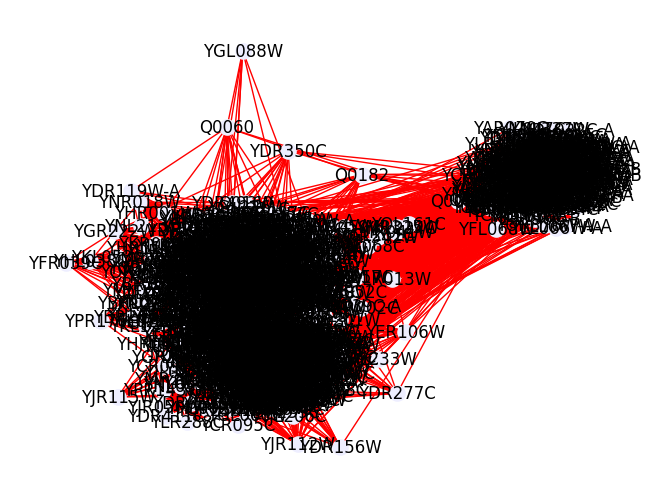

In [21]:
# Visualise Graph
nx.draw_spring(ppi, with_labels=True, node_size=120, node_color='#eeeeff', edge_color='red')

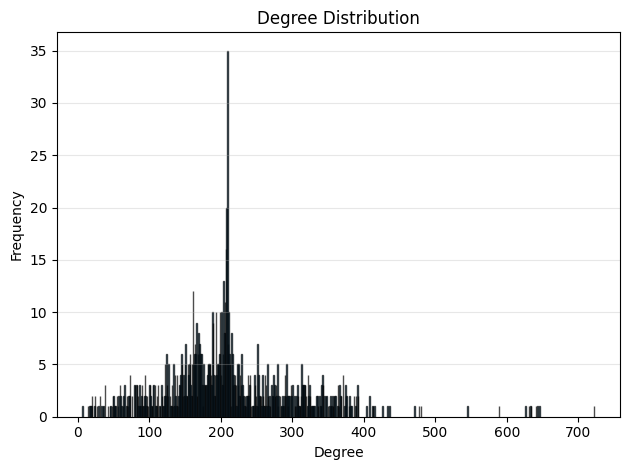

In [22]:
#Print the distribution
degree_dict = degree_distribution(ppi)
plot_degree_distribution(degree_dict)

Check if there are any attributes on the nodes (should be empty)

In [23]:
ppi.nodes["Q0010"].keys()

dict_keys([])

Check if there are any attributes on the edges (should be empty)

In [24]:
ppi.edges['Q0010', 'YMR207C'].keys()

dict_keys([])

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<b>Challenge 1:</b> Use networkx functions to answer the following questions. 

1. What is the graph density? 
2. What is the global clustering coefficient of the graph? 
3. What is the average (shortest) path length of the graph? 
4. How many components are in the graph? Is it fully connected? 

Given the above metrics and the degree distribution, what type of graph are we dealing with? <br>
Does it fit perfectly into our Lattice, Random, Small-World, or Scale-Free archetypes, or does it have features of multiple archetypes? 

</div>

In [ ]:
# YOUR CODE BELOW
density = 
gcc = 
apl = 
n_comps = 
# YOUR CODE ABOVE

print(f"Graph density:          {density}")
print(f"Clustering coefficient: {gcc}")
print(f"Average path length:    {apl}")
print(f"Number of Components:   {n_comps}")

Graph density:          0.2102822822822823
Clustering coefficient: 0.57989033117986
Average path length:    1.9225905905905907
Number of Components:   1


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;"></div>

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<b>Challenge 2:</b> Use networkx functions to answer the following questions. 

1. What is the degree centrality of node 'Q0010', and how does this rank among all nodes?
3. What is the eigenvector centrality of node 'Q0010', and how does this rank among all nodes? 
3. What is the betweenness centrality of node 'Q0010', and how does this rank among all nodes? 

</div>

In [ ]:
# create a dataframe to store metrics for each node
df = pd.DataFrame(index=list(ppi.nodes()))
# YOUR CODE BELOW
df['degree'] = 
df['eigenvector'] = 
df['betweenness'] = 
# YOUR CODE ABOVE

# add columns for ranks
df['degree_rank'] = df['degree'].rank(ascending=False, method='min').astype(int)
df['eigenvector_rank'] = df['eigenvector'].rank(ascending=False, method='min').astype(int)
df['betweenness_rank'] = df['betweenness'].rank(ascending=False, method='min').astype(int)

# print out values
query = 'Q0010'
print(f"degree centrality:      {df.loc[query, 'degree']:.3f}, rank={df.loc[query, 'degree_rank']}")
print(f"eigenvector centrality: {df.loc[query, 'eigenvector']:.3f}, rank={df.loc[query, 'eigenvector_rank']}")
print(f"betweenness centrality: {df.loc[query, 'betweenness']:.3f}, rank={df.loc[query, 'betweenness_rank']}")

degree centrality:      0.723, rank=1
eigenvector centrality: 0.089, rank=1
betweenness centrality: 0.022, rank=2


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;"></div>

In [ ]:
# What's the node with highest betweenness centrality?
df.sort_values(by=["betweenness"], ascending=False)

,degree,eigenvector,betweenness,degree_rank,eigenvector_rank,betweenness_rank
YOL161C,0.293293,0.019760,2.349930e-02,171,607,1
Q0010,0.722723,0.088945,2.162111e-02,1,1,2
YLR388W,0.254254,0.033962,1.456049e-02,255,362,3
YKL224C,0.262262,0.019709,1.423421e-02,238,608,4
YMR325W,0.260260,0.019847,1.390408e-02,243,601,5
...,...,...,...,...,...,...
YDR015C,0.146146,0.001098,5.111505e-06,791,987,996
YJR115W,0.014014,0.001915,3.399454e-06,999,857,997
YOR329W-A,0.145145,0.001027,2.248965e-06,796,993,998
YGR270C-A,0.124124,0.000894,1.735332e-07,850,997,999


The final code cell below plots the neighbors for a given node.<br>
Can be used to visualise a key node, for example "Q0010" which has highest degree & eigenvector centrality. 

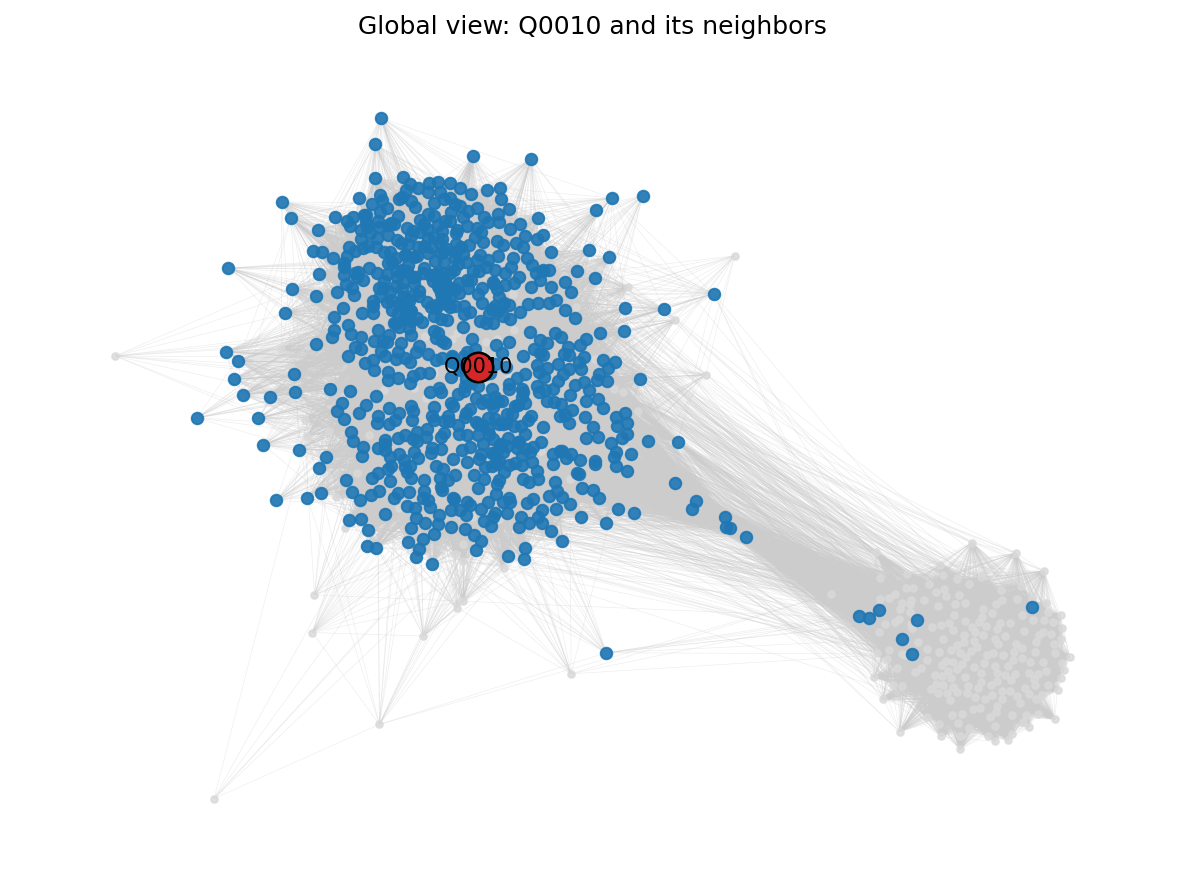

In [35]:
G = ppi.to_undirected().copy()
G.remove_edges_from(nx.selfloop_edges(G))
# Also, try YOL161C
target = "Q0010"

# Reusable layout (set a seed for reproducibility)
pos = nx.spring_layout(G, seed=42, k=None)  # k=None lets nx choose based on graph size

# 1-hop neighborhood
nbrs = set(G.neighbors(target))
target_plus_nbrs = nbrs | {target}

plt.figure(figsize=(8,6), dpi=150)

# base layer
nx.draw_networkx_edges(G, pos, width=0.3, edge_color="#cccccc", alpha=0.35)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color="#d9d9d9", alpha=0.8)

# neighbors
nx.draw_networkx_nodes(G, pos, nodelist=list(nbrs), node_size=30, node_color="#1f77b4", alpha=0.9)

# highlight target
nx.draw_networkx_nodes(G, pos, nodelist=[target], node_size=200, node_color="#d62728", edgecolors="black", linewidths=1.2)

# optional label for the target only
nx.draw_networkx_labels(G, pos, labels={target: target}, font_size=10)

plt.title(f"Global view: {target} and its neighbors")
plt.axis("off"); plt.tight_layout(); plt.show()